In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from struct import unpack

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [ ]:
sns.set_theme()

## Determinação de $\alpha(x)$

In [ ]:
N = 4096
L = 30		# cm

In [ ]:
dL = L / N	# cm

In [ ]:
grid = np.zeros((N, N))
x = np.linspace(0, L, N)

with open('grid', 'rb') as file:
  data = file.read()

  k = 0
  for i in range(N):
    for j in range(N):
      grid[i][j] = unpack('f', data[4*k:4*(k+1)])[0]
      k += 1

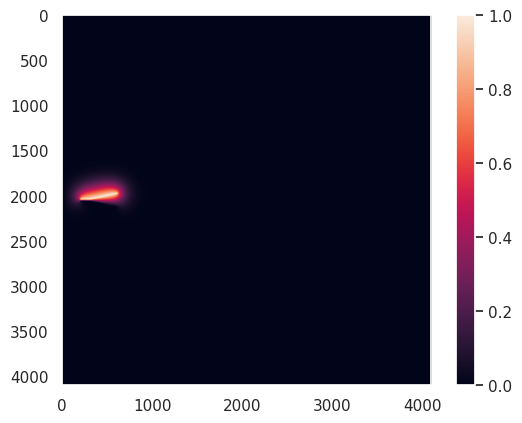

In [ ]:
plt.imshow(grid)
plt.grid(False)
plt.colorbar()
plt.show()

In [ ]:
pots = grid[N//2]
elec = (grid[N//2-1] - grid[N//2+1]) / (2*dL)

In [ ]:
alpha = elec / pots

<ipython-input-35-a8781a4d2303>:1: RuntimeWarning: invalid value encountered in true_divide
  alpha = elec / pots


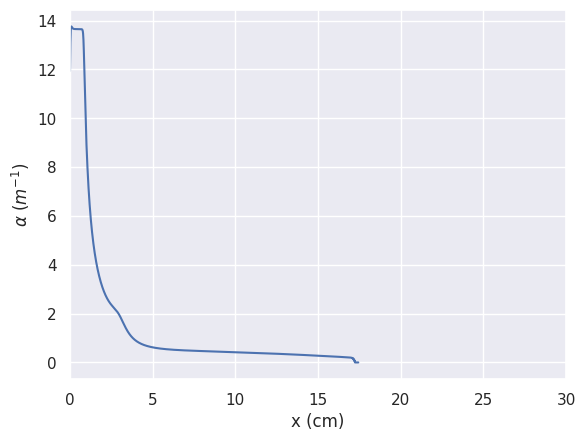

In [ ]:
plt.plot(x - 1.5, alpha)
plt.xlim(0, 30)
plt.xlabel('x (cm)')
plt.ylabel('$\\alpha$ ($m^{-1}$)')
plt.show()

In [ ]:
x = np.linspace(0, L, N)
func = interp1d(x - 1.5, alpha)
x = np.arange(0, 28.1, 0.1)
y = np.nan_to_num(x=func(x), nan=0)
np.savetxt('alpha.txt', y)

## Determinação de $\beta(x)$

A relação entre o campo magnético $B$ e a corrente que circuila no circuito $i$ é dada por:

$$ B(x) = \beta(x)i $$

onde, $\beta(x)$ é uma função de proporcionalidade.

In [ ]:
R, sR = 68.3, 0.5
voltages = np.array([ 4, 9.9, 14.9, 20 ])
currents = voltages / R

In [ ]:
mag_data  		 = np.loadtxt('magnetic.txt').transpose()
mag_data[0] 	-= 7
mag_data[1:] 	*= 10

In [ ]:
betas = (mag_data[1:].transpose() / currents).transpose()

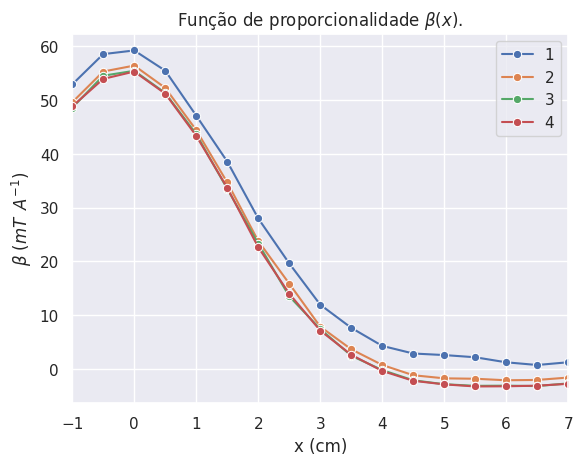

In [ ]:
plt.title('Função de proporcionalidade $\\beta(x)$.')

for i in range(1, mag_data.shape[0]):
  sns.lineplot(x=mag_data[0], y=betas[i-1]*1E3, marker='o', label=f'{i}')

plt.xlabel('x (cm)')
plt.ylabel('$\\beta$ ($mT \\hspace{0.5} A^{-1}$)')
plt.xlim(-1, 7)
plt.show()

In [ ]:
def fit(x, a, b, c): return a + b / np.cosh(c * x)

In [ ]:
popt, pcov = curve_fit(
	fit,
	xdata=mag_data[0],
	ydata=betas[1:].mean(axis=0)
)

In [ ]:
x = np.linspace(-1, 7, 100)
y = fit(x, popt[0], popt[1], popt[2])

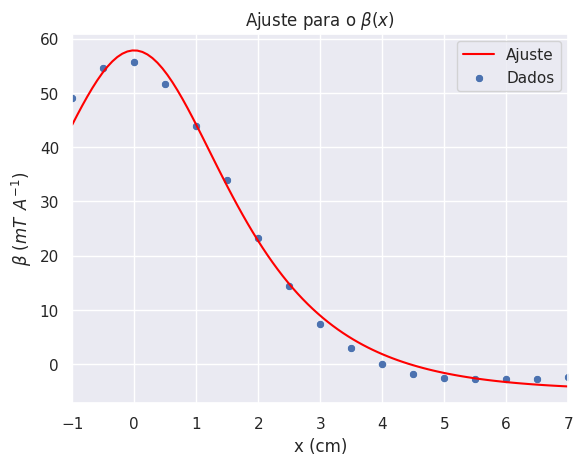

In [ ]:
plt.title('Ajuste para o $\\beta(x)$')
sns.lineplot(x=x, y=y*1E3, color='red', label='Ajuste')
sns.scatterplot(x=mag_data[0], y=betas[1:].mean(axis=0)*1E3, label='Dados')
plt.xlim(-1, 7)
plt.xlabel('x (cm)')
plt.ylabel('$\\beta$ ($mT \hspace{0.5} A^{-1}$)')
plt.show()

In [ ]:
x = np.arange(0, 28.1, 0.1)
b = fit(x, popt[0], popt[1], popt[2])
np.savetxt('beta.txt', b)

## Comparação das trajetórias

### Atividade 1 - Campop Elétrico

In [172]:
exp = np.loadtxt('atv1/acfix.txt').transpose()
sim = np.loadtxt('atv3/atv1-acfix.txt').transpose()

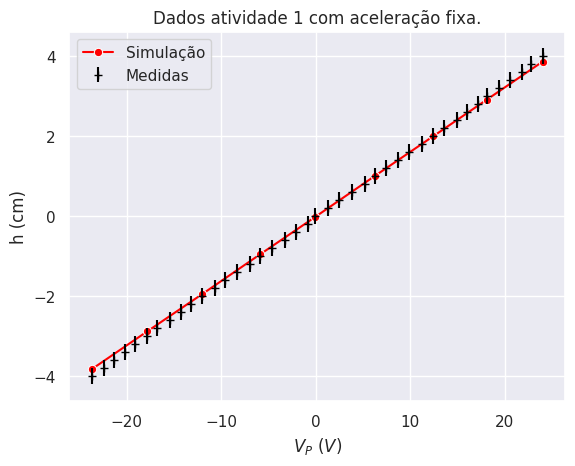

In [173]:
plt.title('Dados atividade 1 com aceleração fixa.')

sns.lineplot(x=sim[0], y=sim[1], color='red', marker='o', label='Simulação')
plt.errorbar(x=exp[0], y=exp[1], yerr=0.2, fmt=' ', marker='+', color='black', label='Medidas')

plt.xlabel('$V_P$ ($V$)')
plt.ylabel('h (cm)')
plt.legend()

plt.savefig('plots/atv1_acfix.png', dpi=300, bbox_inches='tight')
plt.show()

In [175]:
exp = np.loadtxt('atv1/deflexfix.txt').transpose()
sim = np.loadtxt('atv3/atv1-deflexfix.txt').transpose()

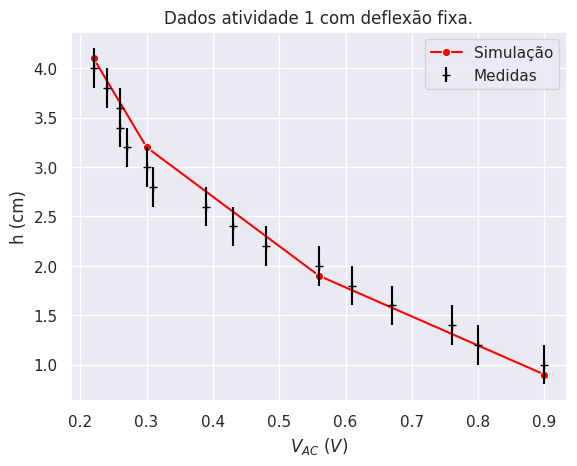

In [176]:
plt.title('Dados atividade 1 com deflexão fixa.')

sns.lineplot(x=sim[0], y=sim[1], color='red', marker='o', label='Simulação')
plt.errorbar(x=exp[0], y=exp[1], yerr=0.2, fmt=' ', marker='+', color='black', label='Medidas')

plt.xlabel('$V_{AC}$ ($V$)')
plt.ylabel('h (cm)')
plt.legend()

plt.savefig('plots/atv1_deflexfix.png', dpi=300, bbox_inches='tight')
plt.show()

### Atividade 2 - Campo magnético

In [177]:
exp = np.loadtxt('atv2/acfix.txt').transpose()
sim = np.loadtxt('atv3/atv2-acfix.txt').transpose()

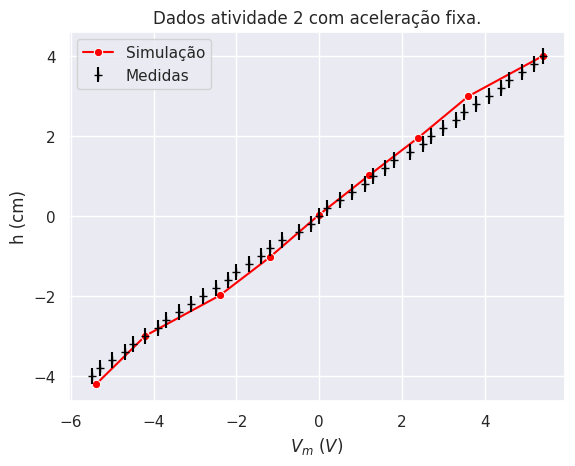

In [179]:
plt.title('Dados atividade 2 com aceleração fixa.')

sns.lineplot(x=sim[0]*60, y=sim[1], color='red', marker='o', label='Simulação')
plt.errorbar(x=exp[0], y=exp[1] /10, yerr=0.2, fmt=' ', marker='+', color='black', label='Medidas')

plt.xlabel('$V_{m}$ ($V$)')
plt.ylabel('h (cm)')
plt.legend()

plt.savefig('plots/atv2_acfix.png', dpi=300, bbox_inches='tight')
plt.show()

In [180]:
exp = np.loadtxt('atv2/magfix.txt').transpose()
sim = np.loadtxt('atv3/atv2-magfix.txt').transpose()

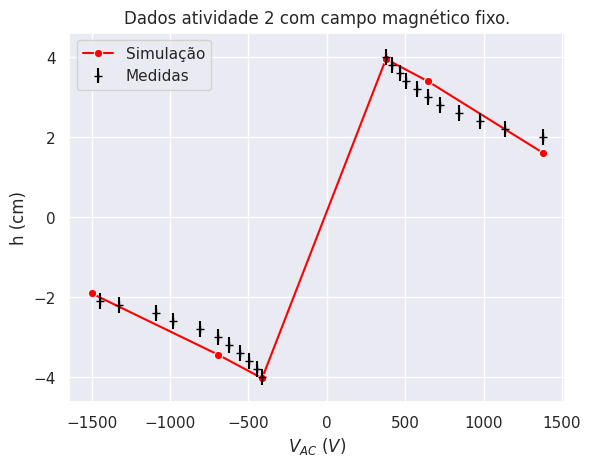

In [181]:
plt.title('Dados atividade 2 com campo magnético fixo.')

sns.lineplot(x=sim[0], y=sim[1], color='red', marker='o', label='Simulação')
plt.errorbar(x=exp[0] * 10, y=exp[1] / 10, yerr=0.2, fmt=' ', marker='+', color='black', label='Medidas')

plt.xlabel('$V_{AC}$ ($V$)')
plt.ylabel('h (cm)')
plt.legend()

plt.savefig('plots/atv2_magfix.png', dpi=300, bbox_inches='tight')
plt.show()